In [29]:
from denoising_diffusion_pytorch import Unet, GaussianDiffusion, Trainer
from diffusers import AutoencoderKL

from diffusers.image_processor import VaeImageProcessor
import torch

from torch.distributions import transforms
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
s_t = transforms.SigmoidTransform()

In [9]:
tensor = torch.load("/Users/emildeepset/Desktop/DiffusionModelLatents/data/train/20-20-0034-R_1_P_M_10_1_latent.pt", weights_only=True)
tensor = tensor * 0.18215
tensor.shape

mean = tensor.mean()
std = tensor.std()
print(f"Mean: {mean.item()}, Standard Deviation: {std.item()}")


tensor = s_t(tensor)

highest = torch.max(tensor)
lowest = torch.min(tensor)

print("Highest value:", highest.item())
print("Lowest value:", lowest.item())

Mean: 0.3681640625, Standard Deviation: 0.5869140625
Highest value: 0.9990234375
Lowest value: 6.103515625e-05


In [35]:
outliers_above_10 = 0
outliers_below_neg10 = 0



for i, pt_file in enumerate(pt_files[:1200]):  # Limit to first 1200 files
    file_path = os.path.join(directory, pt_file)

    try:
        tensor = torch.load(file_path)  # Load .pt file

        file_mean = tensor.mean()
        file_std = tensor.std()

        means.append(file_mean)
        stds.append(file_std)

        print(f"Processed file {i + 1}/{min(len(pt_files), 1200)}: {pt_file} | Mean: {file_mean:.4f}, SD: {file_std:.4f}")
    except Exception as e:
        print(f"Error processing file {pt_file}: {e}")

# Aggregate results
overall_mean = np.mean(means) if means else None
overall_std = np.mean(stds) if stds else None

print("\nSummary:")
print(f"Overall Mean: {overall_mean:.4f}")
print(f"Overall SD: {overall_std:.4f}")

/var/folders/p3/xqxj8w717q9c1cnn2m_3g25m0000gn/T/ipykernel_33028/2766224855.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  tensor = torch.load(file_path)  # Load .pt f

Processed file 1/1200: 20-20-0034-R_1_P_M_10_101_latent.pt | Mean: 1.9473, SD: 3.2402
Processed file 2/1200: 20-20-0034-R_1_P_M_10_102_latent.pt | Mean: 1.8193, SD: 3.3242
Processed file 3/1200: 20-20-0034-R_1_P_M_10_105_latent.pt | Mean: 1.7354, SD: 3.2422
Processed file 4/1200: 20-20-0034-R_1_P_M_10_107_latent.pt | Mean: 1.9229, SD: 3.1699
Processed file 5/1200: 20-20-0034-R_1_P_M_10_109_latent.pt | Mean: 1.8193, SD: 3.4570
Processed file 6/1200: 20-20-0034-R_1_P_M_10_10_latent.pt | Mean: 1.8516, SD: 3.2266
Processed file 7/1200: 20-20-0034-R_1_P_M_10_111_latent.pt | Mean: 2.0508, SD: 3.2520
Processed file 8/1200: 20-20-0034-R_1_P_M_10_113_latent.pt | Mean: 1.8477, SD: 3.3008
Processed file 9/1200: 20-20-0034-R_1_P_M_10_114_latent.pt | Mean: 1.9609, SD: 3.2305
Processed file 10/1200: 20-20-0034-R_1_P_M_10_115_latent.pt | Mean: 1.9180, SD: 3.2285
Processed file 11/1200: 20-20-0034-R_1_P_M_10_11_latent.pt | Mean: 2.0215, SD: 3.1191
Processed file 12/1200: 20-20-0034-R_1_P_M_10_122_late

/var/folders/p3/xqxj8w717q9c1cnn2m_3g25m0000gn/T/ipykernel_33028/2897207443.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  tensor = torch.load(file_path)  # Load .pt f

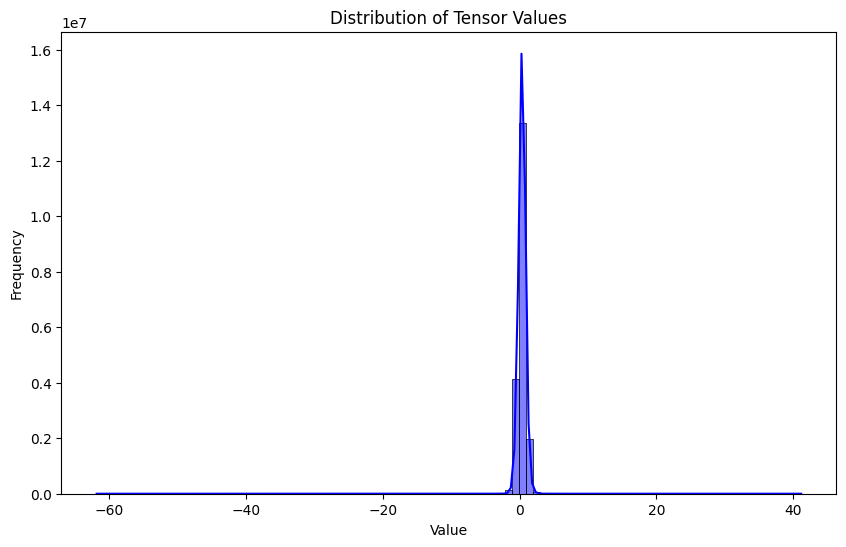

Summary Statistics:
Mean: 0.3475
Standard Deviation: 0.5966
Min Value: -61.8438
Max Value: 41.1562


In [32]:
directory = "/Users/emildeepset/Desktop/DiffusionModelLatents/data/train"

pt_files = [f for f in os.listdir(directory) if f.endswith('.pt')]
pt_files.sort()

# Aggregate all tensor values
all_values = []

for pt_file in pt_files[:100]:  # Limit to first 1200 files
    file_path = os.path.join(directory, pt_file)

    try:
        tensor = torch.load(file_path)  # Load .pt file
        tensor = tensor * 0.18215  # Apply scaling
        all_values.extend(tensor.flatten().tolist())  # Flatten and add to list
    except Exception as e:
        print(f"Error processing file {pt_file}: {e}")

# Convert to numpy array for analysis
all_values = np.array(all_values)

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(all_values, bins=100, kde=True, color='blue')
plt.title("Distribution of Tensor Values")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

# Optionally, print summary statistics
print("Summary Statistics:")
print(f"Mean: {np.mean(all_values):.4f}")
print(f"Standard Deviation: {np.std(all_values):.4f}")
print(f"Min Value: {np.min(all_values):.4f}")
print(f"Max Value: {np.max(all_values):.4f}")